First 5 rows of the DataFrame:
   Rk         Player Class Pos          School   G   MP  TRB  AST  STL  ...  \
0   1   Amaree Abram    SO   G    Georgia Tech  10  108   17   11    1  ...   
1   2   Sola Adebisi    FR   F   Florida State   7    9    1    1    0  ...   
2   3  Prince Aligbe    SO   F  Boston College  35  651  119   21   15  ...   
3   4     Abe Atiyeh    SR   G  Boston College   4    6    0    0    0  ...   
4   5    Zack Austin    JR   F      Pittsburgh  33  746  137   29   32  ...   

   TOV  PF  PTS    FG%    2P%    3P%    FT%   PER   WS  BPM  
0    9  10   34  0.262  0.318  0.200  0.615   4.1 -0.1 -6.4  
1    1   1    2  0.500  0.500    NaN    NaN   3.5  0.0 -6.7  
2   30  51  164  0.435  0.522  0.147  0.620   9.4  0.9 -1.3  
3    1   0    3  0.333  0.000  1.000    NaN   1.1  0.0 -8.2  
4   13  35  216  0.417  0.563  0.295  0.737  18.0  2.9  7.9  

[5 rows x 21 columns]

Total points scored by all players: 38411

Player with most minutes played: Casey Morsell (1333 mi

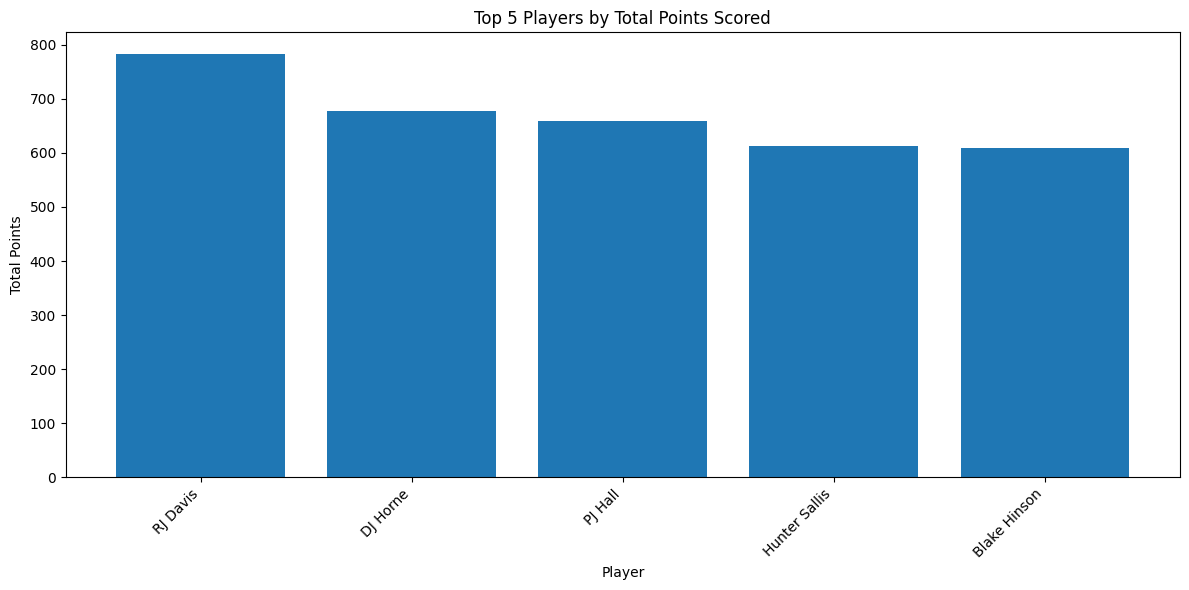

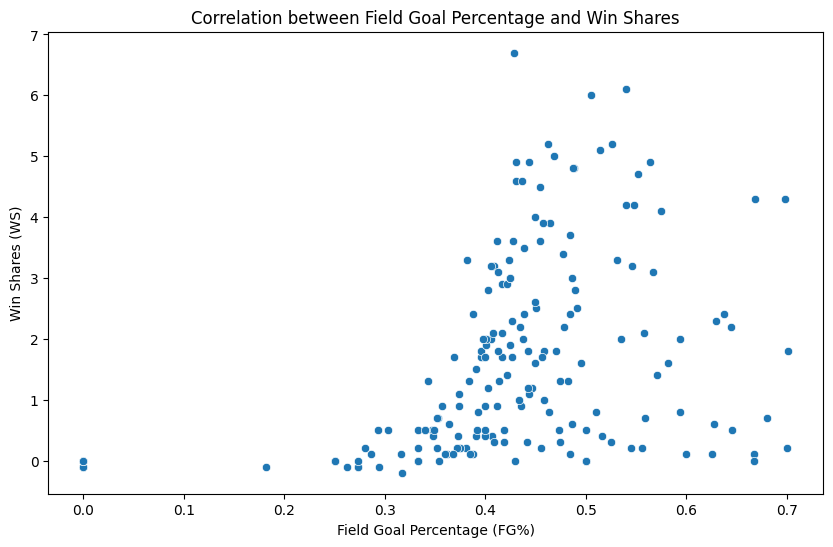


Correlation coefficient between FG% and WS: 0.42

Summary of Findings:
1. Total points scored by all players: 38411
2. Player with most minutes played: Casey Morsell (1333 minutes)
3. Top rebounder: Armando Bacot (380 rebounds)
4. Player with highest assists (>500 minutes played): Reece Beekman (212 assists)
5. Top assist leader: Reece Beekman (212 assists)
6. Top shot blocker: Ryan Dunn (77 blocks)
7. School with most points: NC State (3101 points)
8. School with most assists: Duke (551 assists)
9. Correlation between FG% and WS: 0.42


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reading the CSV File
# Load the provided CSV file into a pandas DataFrame with correct headers
df = pd.read_csv('acc_players-2324F.csv', skiprows=1)

# Set the correct column names
df.columns = ['Rk', 'Player', 'Class', 'Pos', 'School', 'G', 'MP', 'TRB', 'AST', 'STL', 
              'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'PER', 'WS', 'BPM']

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# 2. Basic Analysis
# Calculate the total points scored by all players combined
total_points = df['PTS'].sum()
print(f"\nTotal points scored by all players: {total_points}")

# Find the player who has played the most minutes (MP)
most_minutes_player = df.loc[df['MP'].idxmax()]
print(f"\nPlayer with most minutes played: {most_minutes_player['Player']} ({most_minutes_player['MP']} minutes)")

# Identify the top 5 players in terms of total rebounds (TRB)
top_rebounders = df.nlargest(5, 'TRB')
print("\nTop 5 players in terms of total rebounds (TRB):")
print(top_rebounders[['Player', 'TRB']])

# 3. Player Filtering
# Create a new DataFrame containing only players who played more than 500 minutes
df_filtered = df[df['MP'] > 500]

# From this filtered DataFrame, determine the player with the highest total assists (AST)
highest_assists_player = df_filtered.loc[df_filtered['AST'].idxmax()]
print(f"\nPlayer with highest total assists (among those who played >500 minutes): {highest_assists_player['Player']} ({highest_assists_player['AST']} assists)")

# Who are the top 3 Assist Leads in the League?
top_assist_leads = df.nlargest(3, 'AST')
print("\nTop 3 Assist Leads in the League:")
print(top_assist_leads[['Player', 'AST']])

# Who are the top 3 Shot Blockers?
top_shot_blockers = df.nlargest(3, 'BLK')
print("\nTop 3 Shot Blockers:")
print(top_shot_blockers[['Player', 'BLK']])

# 4. School-Based Analysis
# Group the players by School and calculate the total points scored by each school
school_points = df.groupby('School')['PTS'].sum().sort_values(ascending=False)
print("\nTotal points scored by each school:")
print(school_points)

# Group the players by School and calculate the total assists (AST) for each team
school_assists = df.groupby('School')['AST'].sum().sort_values(ascending=False)
print("\nTotal assists by each school:")
print(school_assists)

# Sort the schools by total points scored and display the top 3 schools
top_3_schools = school_points.head(3)
print("\nTop 3 schools by total points scored:")
print(top_3_schools)

# 5. Extra Credit (Bonus)
# Create a bar chart showing the top 5 players by total points scored (PTS)
top_5_scorers = df.nlargest(5, 'PTS')
plt.figure(figsize=(12, 6))
plt.bar(top_5_scorers['Player'], top_5_scorers['PTS'])
plt.title('Top 5 Players by Total Points Scored')
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation: Investigate whether there is any correlation between a player's field goal
# percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the
# correlation coefficient.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FG%', y='WS', data=df)
plt.title('Correlation between Field Goal Percentage and Win Shares')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.show()

correlation = df['FG%'].corr(df['WS'])
print(f"\nCorrelation coefficient between FG% and WS: {correlation:.2f}")

# Print a summary of the findings
print("\nSummary of Findings:")
print(f"1. Total points scored by all players: {total_points}")
print(f"2. Player with most minutes played: {most_minutes_player['Player']} ({most_minutes_player['MP']} minutes)")
print(f"3. Top rebounder: {top_rebounders.iloc[0]['Player']} ({top_rebounders.iloc[0]['TRB']} rebounds)")
print(f"4. Player with highest assists (>500 minutes played): {highest_assists_player['Player']} ({highest_assists_player['AST']} assists)")
print(f"5. Top assist leader: {top_assist_leads.iloc[0]['Player']} ({top_assist_leads.iloc[0]['AST']} assists)")
print(f"6. Top shot blocker: {top_shot_blockers.iloc[0]['Player']} ({top_shot_blockers.iloc[0]['BLK']} blocks)")
print(f"7. School with most points: {school_points.index[0]} ({school_points.iloc[0]} points)")
print(f"8. School with most assists: {school_assists.index[0]} ({school_assists.iloc[0]} assists)")
print(f"9. Correlation between FG% and WS: {correlation:.2f}")